## TASK AT HAND 
-  PREDICTING THE CUSTOMER FLIGHT BOOKING BEHAVIOUR AND MAKING A MODEL TO PREDICT THE SAME USING RANDOM FOREST MACHINE LEARNING ALGORITHM

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Problem Statement:


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# utf-8 error so used encoding='latin-1'
data = pd.read_csv("/content/drive/MyDrive/customer_booking.csv", encoding='latin-1')
data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


#### Exploring the Data Set 

In [ ]:
data.shape

(50000, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [ ]:
data.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

##### OBSERVATION:
- There is no null value in the dataset 


In [ ]:
data1 = data.select_dtypes(include=['object'])
data1

,sales_channel,trip_type,flight_day,route,booking_origin
0,Internet,RoundTrip,Sat,AKLDEL,New Zealand
1,Internet,RoundTrip,Sat,AKLDEL,New Zealand
2,Internet,RoundTrip,Wed,AKLDEL,India
3,Internet,RoundTrip,Sat,AKLDEL,New Zealand
4,Internet,RoundTrip,Wed,AKLDEL,India
...,...,...,...,...,...
49995,Internet,RoundTrip,Sat,PERPNH,Australia
49996,Internet,RoundTrip,Sun,PERPNH,Australia
49997,Internet,RoundTrip,Sat,PERPNH,Australia
49998,Internet,RoundTrip,Mon,PERPNH,Australia


In [ ]:
data1.describe()

,sales_channel,trip_type,flight_day,route,booking_origin
count,50000,50000,50000,50000,50000
unique,2,3,7,799,104
top,Internet,RoundTrip,Mon,AKLKUL,Australia
freq,44382,49497,8102,2680,17872


In [ ]:
print(f"TRIP DAY \n************************************\n are: \n{data1.trip_type.value_counts()}\n")
print('************************************')
print(f"FLIGHT DAY \n************************************\n are: \n{data1.flight_day.value_counts()}\n")
print('************************************')
print(f"BOOKING ORIGIN \n************************************\n are: \n{data1.booking_origin.value_counts()}\n")
print('************************************')
print(f"SALES_CHANNEL \n************************************\n are: \n{data1.sales_channel.value_counts()}\n")

TRIP DAY 
************************************
 are: 
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

************************************
FLIGHT DAY 
************************************
 are: 
Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: flight_day, dtype: int64

************************************
BOOKING ORIGIN 
************************************
 are: 
Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64

************************************
SALES_CHANNEL 
************************************
 are: 
Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64



##### PERCENTAGE OF BOOKING FROM TOP 10 COUNTRY 

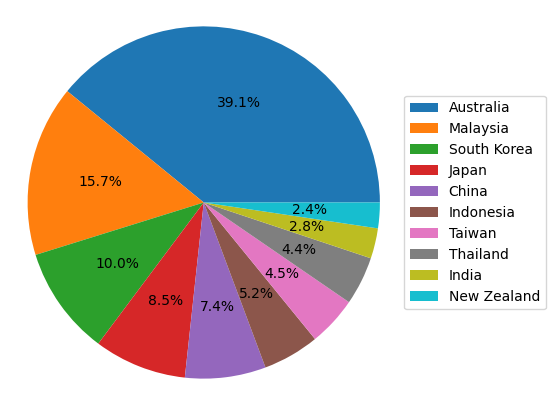

In [ ]:
fig, ax = plt.subplots(figsize=(5,5), subplot_kw=dict(aspect="equal"))

number_country = data['booking_origin'].value_counts()

labels = number_country.index[:10]
sizes = number_country.values[:10]

ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis("equal")
plt.show()

##### FLIGHT DAY AND NUMBER OF BOOKING 

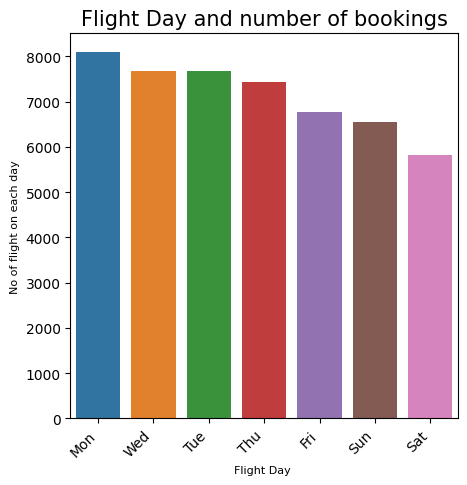

In [ ]:
x = data['flight_day'].value_counts()
y = data['flight_day'].value_counts().index
x_list = []
y_list = []
for i in range(len(x)):
    x_list.append(x[i])
    y_list.append(y[i])
plt.figure(figsize=(5,5))
plt.xlabel('Flight Day ', size=8)
plt.ylabel('No of flight on each day', size=8)
graph = sns.barplot(y = x_list, x = y_list, palette= "tab10")
graph.set_title("Flight Day and number of bookings", fontsize = 15)
graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right',);     

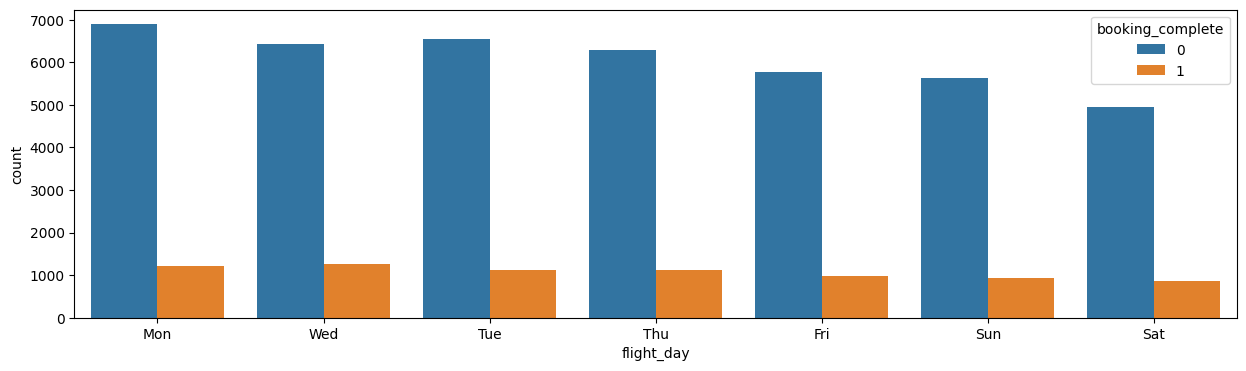

In [ ]:
plt.figure(figsize=(15,4))
sns.countplot(x = 'flight_day', data = data, hue ="booking_complete" , order=data["flight_day"].value_counts().index )
plt.show()

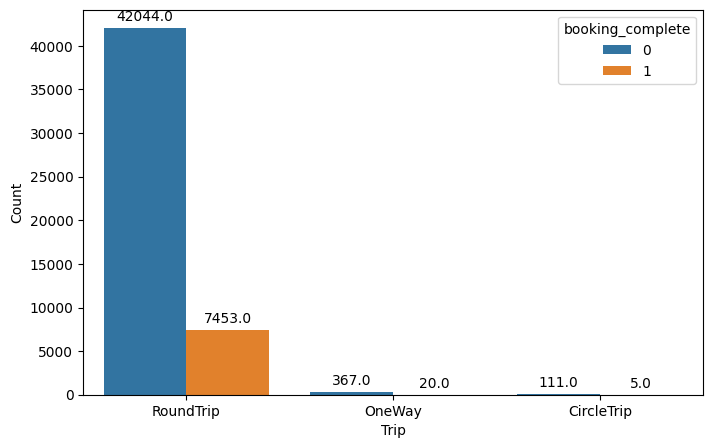

In [ ]:
plt.figure(figsize=(8,5))
plots = sns.countplot(x='trip_type', hue = 'booking_complete', data = data , order = data['trip_type'].value_counts().index)
plt.xlabel("Trip")
plt.ylabel("Count")

for bar in plots.patches:
    plots.annotate(format(bar.get_height()),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                   ha='center', va='center',size=10, xytext=(0, 8),textcoords='offset points')   

#### ONE HOT ENCODING ON CATEGORICAL VARIABLES:


In [ ]:
from sklearn.preprocessing import OneHotEncoder
data1 = pd.get_dummies(data1,drop_first = True)
data1

,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed,route_AKLHGH,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49996,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### EDA on numerical data 

In [ ]:
data2 = data.select_dtypes(include=['int64','float64'])
data2

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,262,19,7,1,0,0,5.52,0
1,1,112,20,3,0,0,0,5.52,0
2,2,243,22,17,1,1,0,5.52,0
3,1,96,31,4,0,0,1,5.52,0
4,2,68,22,15,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,1,0,1,5.62,0
49996,1,111,6,4,0,0,0,5.62,0
49997,1,24,6,22,0,0,1,5.62,0
49998,1,15,6,11,1,0,1,5.62,0


#### HEATMAP

<Axes: >

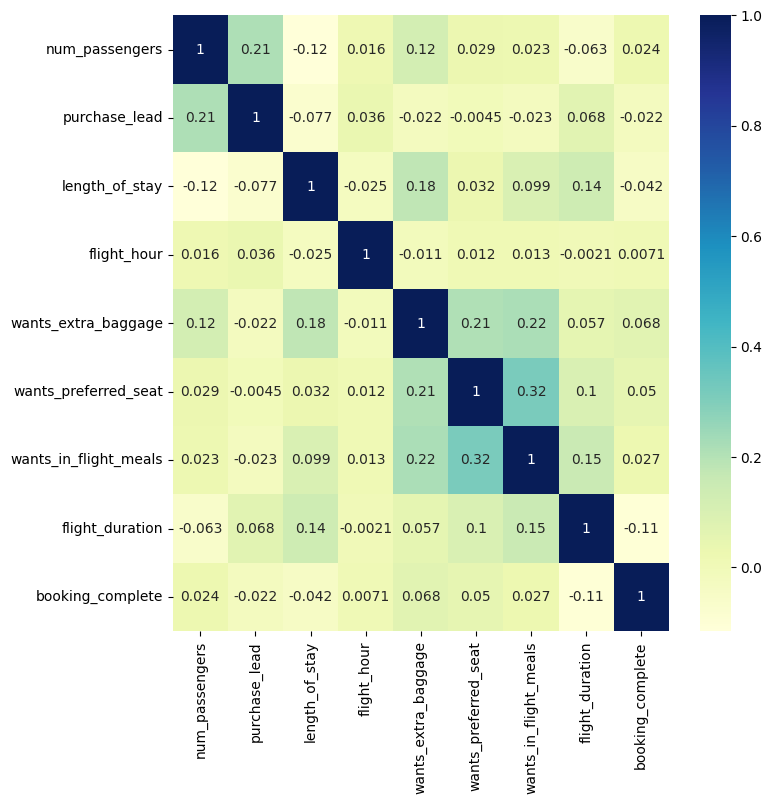

In [ ]:
fig = plt.subplots(figsize=(8,8))
sns.heatmap(data2.corr(),cmap="YlGnBu", annot=True)

- There is a positive correlation between those who wants preffered seats with  those who wants meals in flight and wants extra baggage with correlation of 0.32 and 0.22 respectively.

#### OUTLIER REMOVAL

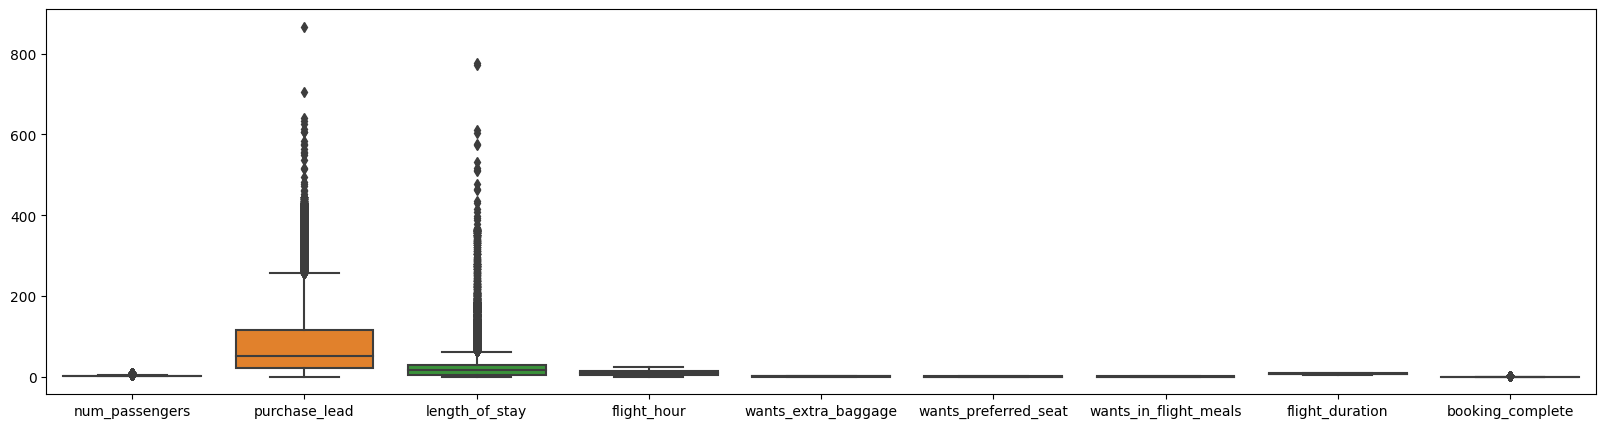

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(data2)
plt.show()

#### Removing outlier using IQR

In [ ]:
# Replacing outliers with median
# function to return a list of index of outliers
column_list = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration']
for feature in column_list:
    Q1= data2[feature].quantile(0.25)
    Q3 =data2[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    
    lower_limit = Q1 - 1.5 * IQR
    
    upper_limit = Q3 + 1.5 * IQR
  
    
    median = data2[feature].median()
    
    data2[feature] = np.where(data2[feature]< lower_limit, median,data2[feature])
    data2[feature] = np.where(data2[feature]> upper_limit, median,data2[feature])

#### Feature Scaling using Standard Scalar

In [ ]:
# Separating dependent and independent variables
from sklearn.preprocessing import StandardScaler
df = pd.concat([data1,data2],axis = 1)

X = df.drop(["booking_complete"] , axis=1)
y = df["booking_complete"]

sc = StandardScaler()
X = pd.DataFrame((sc.fit_transform(X)),columns = X.columns)
X

,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed,route_AKLHGH,...,booking_origin_Vanuatu,booking_origin_Vietnam,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,-0.355785,-0.08832,0.100808,-0.439744,2.757334,-0.388399,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,1.056055,-0.246182,0.231165,-0.381764,0.703747,-0.649919,-0.863497,-1.174175
1,-0.355785,-0.08832,0.100808,-0.439744,2.757334,-0.388399,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,-0.630179,0.767907,0.305232,-1.120780,-1.420965,-0.649919,-0.863497,-1.174175
2,-0.355785,-0.08832,0.100808,-0.439744,-0.362669,-0.388399,-0.417577,-0.425769,2.348512,-0.004472,...,-0.004472,-0.088435,1.056055,2.945705,0.453365,1.465775,0.703747,1.538654,-0.863497,-1.174175
3,-0.355785,-0.08832,0.100808,-0.439744,2.757334,-0.388399,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,-0.630179,0.501916,1.119966,-0.936026,-1.420965,-0.649919,1.158082,-1.174175
4,-0.355785,-0.08832,0.100808,-0.439744,-0.362669,-0.388399,-0.417577,-0.425769,2.348512,-0.004472,...,-0.004472,-0.088435,1.056055,0.036433,0.453365,1.096267,0.703747,-0.649919,1.158082,-1.174175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-0.355785,-0.08832,0.100808,-0.439744,2.757334,-0.388399,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,1.056055,-0.645168,-0.731702,-0.012257,0.703747,-0.649919,1.158082,-1.107368
49996,-0.355785,-0.08832,0.100808,-0.439744,-0.362669,2.574671,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,-0.630179,0.751282,-0.731702,-0.936026,-1.420965,-0.649919,-0.863497,-1.107368
49997,-0.355785,-0.08832,0.100808,-0.439744,2.757334,-0.388399,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,-0.630179,-0.695041,-0.731702,2.389544,-1.420965,-0.649919,1.158082,-1.107368
49998,-0.355785,-0.08832,0.100808,2.274053,-0.362669,-0.388399,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,-0.630179,-0.844661,-0.731702,0.357251,0.703747,-0.649919,1.158082,-1.107368


#### Apply PCA to reduce the dimension of the dataset

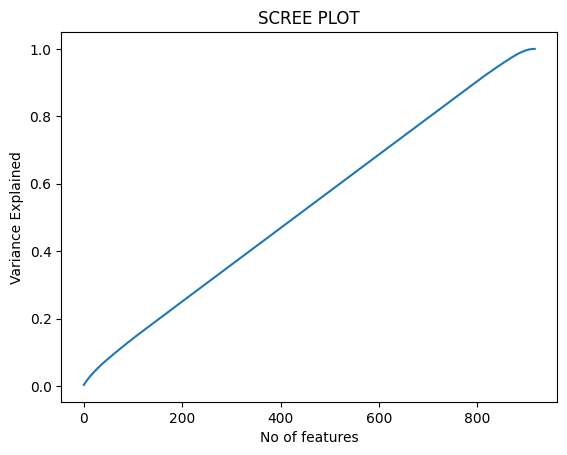

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("No of features")
plt.ylabel("Variance Explained")
plt.title("SCREE PLOT")
plt.show()

- From the scree plot we can see that all the features are important for the prediction

##### CHECK IF THE DATASET IS BALANCED 

In [ ]:
data['booking_complete'].value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

- Since the data is imbalanced we can either apply downsampling or smote to balance the dataset 

##### SMOTE TO RESAMPLE THE DATASET OF MINORITY CLASS

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
counter = Counter(y)
print("Before",counter)
# oversampling the train dataset using SMOTE 
smt = SMOTE()
X_sm,y_sm = smt.fit_resample(X,y)

counter = Counter(y_sm)
print("After",counter)
y_sm.shape

Before Counter({0: 42522, 1: 7478})
After Counter({0: 42522, 1: 42522})


(85044,)

##### SPLITTING THE DATASET INTO TRAINING AND TEST DATASET 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state=42)


#### RANDOM FOREST 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

rf_c = RandomForestClassifier()
rf_c.fit(X_train,y_train)
y_pred = rf_c.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[8014  430]
 [ 905 7660]]


##### ACCURACY AND CLASSIFICATION REPORT 

In [ ]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      8444
           1       0.95      0.89      0.92      8565

    accuracy                           0.92     17009
   macro avg       0.92      0.92      0.92     17009
weighted avg       0.92      0.92      0.92     17009

0.9215121406314304


#### Cross Validation 

In [ ]:
# Using K-FOLD method by using cross_val_score
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(rf_c, X_train, y_train, cv=10)


In [ ]:
k = pd.DataFrame(accuracy)
k

,0
0,0.920929
1,0.919900
2,0.919018
3,0.914168
4,0.916667
5,0.917830
6,0.924151
7,0.919153
8,0.919741
9,0.915919


##### OBSERVATIONS:


- Most of the booking are done on the first half of the week 
- Most of the booking took place from the internet 
- Most of the trip is round trip 
- Australia , Malaysia, South Korea are the top three booking origin  
- Most of the booking were completed on Monday and lowest on Saturday
- Random Forest gave accuracy of 0.92, which makes this model fit for future prediction of bookings 